<a href="https://colab.research.google.com/github/mudita11/Covid-visual/blob/main/PartI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import psycopg2
import pandas as pd
import datetime
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
conn = psycopg2.connect(
    host='covid19db.org',
    port=5432,
    dbname='covid19',
    user='covid19',
    password='covid19')
cur = conn.cursor()

In [7]:
sql_command = """SELECT * FROM epidemiology WHERE source = 'USA_CTP' ORDER by date DESC"""
df_epidemiology = pd.read_sql(sql_command, conn)#, params={'source': 'USA_CTP'})
df_epidemiology.head()

,source,date,country,countrycode,adm_area_1,adm_area_2,adm_area_3,tested,confirmed,recovered,dead,hospitalised,hospitalised_icu,quarantined,gid
0,USA_CTP,2021-03-07,United States,USA,Kentucky,None,None,4819.0,410709.0,4034.0,48145.0,3975672.0,19457.0,None,[USA.18_1]
1,USA_CTP,2021-03-07,United States,USA,Missouri,None,None,8161.0,480643.0,NaN,NaN,4565866.0,NaN,None,[USA.26_1]
2,USA_CTP,2021-03-07,United States,USA,Northern Mariana Islands,None,None,2.0,145.0,NaN,29.0,17574.0,4.0,None,[MNP]
3,USA_CTP,2021-03-07,United States,USA,Mississippi,None,None,6808.0,297581.0,NaN,278162.0,1756955.0,9162.0,None,[USA.25_1]
4,USA_CTP,2021-03-07,United States,USA,Montana,None,None,1381.0,100914.0,NaN,97943.0,1104488.0,4630.0,None,[USA.27_1]


In [8]:
print(df_epidemiology['adm_area_1'].nunique())
print(df_epidemiology['adm_area_1'].unique())

56
['Kentucky' 'Missouri' 'Northern Mariana Islands' 'Mississippi' 'Montana'
 'North Carolina' 'Nebraska' 'Puerto Rico' 'Alaska' 'Louisiana' None
 'Guam' 'Hawaii' 'Utah' 'Oregon' 'Ohio' 'New York' 'Iowa' 'Idaho' 'Maine'
 'Michigan' 'Minnesota' 'Nevada' 'New Mexico' 'New Jersey' 'North Dakota'
 'New Hampshire' 'Illinois' 'Washington' 'Oklahoma' 'Florida' 'Wyoming'
 'Virginia' 'Texas' 'Indiana' 'Alabama' 'Arkansas' 'Tennessee'
 'South Dakota' 'South Carolina' 'Rhode Island' 'Wisconsin' 'Pennsylvania'
 'Virgin Islands' 'West Virginia' 'American Samoa' 'Arizona' 'California'
 'Colorado' 'Connecticut' 'District of Columbia' 'Delaware' 'Maryland'
 'Georgia' 'Kansas' 'Massachusetts' 'Vermont']


In [12]:
sql_command = """SELECT * FROM epidemiology WHERE source = 'USA_CTP' and adm_area_1 = 'Texas'"""
df_epidemiology = pd.read_sql(sql_command, conn)#, params={'source': 'USA_CTP'})
print(df_epidemiology.head())
print(df_epidemiology.shape)

    source        date        country  ... hospitalised_icu quarantined         gid
0  USA_CTP  2020-04-06  United States  ...             None        None  [USA.44_1]
1  USA_CTP  2020-04-05  United States  ...             None        None  [USA.44_1]
2  USA_CTP  2020-12-19  United States  ...             None        None  [USA.44_1]
3  USA_CTP  2020-05-24  United States  ...             None        None  [USA.44_1]
4  USA_CTP  2020-05-23  United States  ...             None        None  [USA.44_1]

[5 rows x 15 columns]
(370, 15)


In [13]:
print(df_epidemiology.columns)
print(df_epidemiology['date'].nunique())
df_epidemiology['date'].unique()[:10]

Index(['source', 'date', 'country', 'countrycode', 'adm_area_1', 'adm_area_2',
       'adm_area_3', 'tested', 'confirmed', 'recovered', 'dead',
       'hospitalised', 'hospitalised_icu', 'quarantined', 'gid'],
      dtype='object')
370


array([datetime.date(2020, 4, 6), datetime.date(2020, 4, 5),
       datetime.date(2020, 12, 19), datetime.date(2020, 5, 24),
       datetime.date(2020, 5, 23), datetime.date(2020, 3, 30),
       datetime.date(2020, 3, 22), datetime.date(2020, 3, 11),
       datetime.date(2020, 12, 8), datetime.date(2020, 8, 31)],
      dtype=object)

In [14]:
start_date = datetime.date(year=2020,  month=3,  day=1)
df_epidemiology = df_epidemiology[df_epidemiology['date'] >= start_date]

In [15]:
df_epidemiology.shape

(370, 15)

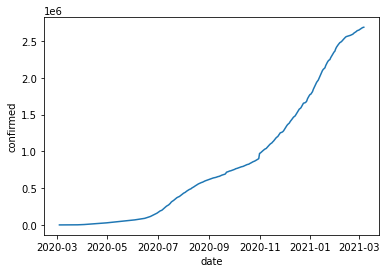

In [16]:
sns.lineplot(data=df_epidemiology, x="date", y="confirmed")